--------------------------------------------
# Title: "Banking Customer Churn & Retention Analysis"
--------------------------------------------


--------------------------------
🧹 Phase 1 — Data Cleaning Steps
--------------------------------

1 — Importing Libraries & Setting Theme

In [381]:
# --------------------------------------------
# 🧩 Step 1: Import Required Libraries
# --------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization settings
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 4)

# handle warnings
import warnings

warnings.filterwarnings("ignore")

2 - Load & Inspect Dataset

In [382]:
#-------------------
# Load Dataset 
#-------------------

df = pd.read_csv("banking_customer_dirty_dataset_large.csv")
print(" Dataset Loaded Successfully")

#-------------------
# inspect Dataset 
#-------------------

print("\nShape of Dataset:")
display(df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nSummary Statistics:")
display(df.describe(include="all"))

print("\nMissing Values:")
display(df.isnull().sum())

print("\nDuplicate Values:")
display(df.duplicated().sum())

print("\nUnique Values:")
uni_col = ['Geography', 'Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in uni_col: 
    print(f"{col} = {df[col].unique()}\n")

 Dataset Loaded Successfully

Shape of Dataset:


(720, 14)


First 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15515795,Miller,573.0,Germany,female,67.0,6,246914.90,1,Yes,Inactive,98945.27,Churned
1,2,15500860,Johnson,490.0,Germany,Male,50.0,7,72873.94,2,Yes,Active,37508.18,Churned
2,3,15576820,Brown,NaN,spain,female,24.0,1,192685.63,2,No,Active,39644.42,Churned
3,4,15554886,brown,564.0,Germany,Female,87.0,6,106873.91,1,Yes,Inactive,15809.63,Still customer
4,5,15506265,Jones,NaN,germany,female,32.0,1,NaN,3,No,Active,55089.45,Still customer



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        720 non-null    int64  
 1   CustomerId       720 non-null    int64  
 2   Surname          720 non-null    object 
 3   CreditScore      684 non-null    float64
 4   Geography        685 non-null    object 
 5   Gender           684 non-null    object 
 6   Age              683 non-null    float64
 7   Tenure           720 non-null    int64  
 8   Balance          685 non-null    float64
 9   NumOfProducts    720 non-null    int64  
 10  HasCrCard        720 non-null    object 
 11  IsActiveMember   720 non-null    object 
 12  EstimatedSalary  720 non-null    float64
 13  Exited           720 non-null    object 
dtypes: float64(4), int64(4), object(6)
memory usage: 78.9+ KB


None


Summary Statistics:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,720.000000,7.200000e+02,720,684.000000,685,684,683.000000,720.000000,685.000000,720.000000,720,720,720.000000,720
unique,NaN,NaN,13,NaN,9,4,NaN,NaN,NaN,NaN,2,2,NaN,2
top,NaN,NaN,Miller,NaN,france,female,NaN,NaN,NaN,NaN,No,Active,NaN,Still customer
freq,NaN,NaN,109,NaN,119,189,NaN,NaN,NaN,NaN,384,374,NaN,362
mean,351.134722,1.555086e+07,NaN,599.923977,NaN,NaN,54.793558,4.495833,131332.947737,2.041667,NaN,NaN,79744.094292,NaN
std,201.411341,2.918620e+04,NaN,148.387882,NaN,NaN,20.862273,2.889718,70842.402686,0.814293,NaN,NaN,40319.328153,NaN
min,1.000000,1.550021e+07,NaN,351.000000,NaN,NaN,18.000000,0.000000,785.230000,1.000000,NaN,NaN,10865.740000,NaN
25%,177.750000,1.552533e+07,NaN,469.000000,NaN,NaN,37.000000,2.000000,73443.980000,1.000000,NaN,NaN,46206.972500,NaN
50%,350.500000,1.555204e+07,NaN,598.000000,NaN,NaN,55.000000,4.500000,135755.360000,2.000000,NaN,NaN,79046.075000,NaN
75%,524.250000,1.557588e+07,NaN,727.000000,NaN,NaN,72.000000,7.000000,193575.670000,3.000000,NaN,NaN,113432.677500,NaN



Missing Values:


RowNumber           0
CustomerId          0
Surname             0
CreditScore        36
Geography          35
Gender             36
Age                37
Tenure              0
Balance            35
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


Duplicate Values:


np.int64(18)


Unique Values:
Geography = ['Germany' 'spain' 'germany' 'france' 'France' 'Spain' nan 'FRANCE'
 'SPAIN' 'GERMANY']

Gender = ['female' 'Male' 'Female' 'male' nan]

Tenure = [6 7 1 8 0 9 5 4 2 3]

NumOfProducts = [1 2 3]

HasCrCard = ['Yes' 'No']

IsActiveMember = ['Inactive' 'Active']

Exited = ['Churned' 'Still customer']



3 - Remove Duplicates

In [383]:
#-------------------
# Remove Duplicates Rows
#-------------------

print("Shape before removing duplicates:", df.shape)

df = df.drop_duplicates()

print("✅ Duplicates removed successfully!")
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (720, 14)
✅ Duplicates removed successfully!
Shape after removing duplicates: (702, 14)


4 - Data Type Conversion & Standardization

In [384]:
# --------------------------------------------
# 🧩 Step 4: Data Type Conversion & Standardization
# --------------------------------------------

# Handle Data type

df['Age'] = df['Age'].astype('Int64')

# Handle Standardization
for col in df.columns: 
    if col in ['Surname','Geography' , 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']: 
        df[col] = df[col].str.strip().str.capitalize()

print("\nUnique Values after Conversion & Standardization:\n")
uni_col_1 = ['Surname','Geography' , 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in uni_col_1: 
    print(f"{col} = {df[col].unique()}\n")



Unique Values after Conversion & Standardization:

Surname = ['Miller' 'Johnson' 'Brown' 'Jones' 'Davis' 'Smith' 'Williams']

Geography = ['Germany' 'Spain' 'France' nan]

Gender = ['Female' 'Male' nan]

HasCrCard = ['Yes' 'No']

IsActiveMember = ['Inactive' 'Active']

Exited = ['Churned' 'Still customer']



4 - Handle missing values

In [385]:
# --------------------------------------------
# 🧩 Step 5: Handle missing values
# --------------------------------------------
# Fill logical columns 
cat_col_misval = ['Geography', 'Gender']
for col in cat_col_misval: 
    df[col]= df[col].fillna(df[col].mode()[0])
    
# Numeric columns  
num_col_misval = ['CreditScore', 'Age', 'Balance' ]
for col in num_col_misval: 
    df[col]= df[col].fillna(df[col].median())


In [386]:
print("\nUnique Values after Conversion & Standardization:\n")
uni_col_1 = ['Surname','Geography' , 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in uni_col_1: 
    print(f"{col} = {df[col].unique()}\n")


Unique Values after Conversion & Standardization:

Surname = ['Miller' 'Johnson' 'Brown' 'Jones' 'Davis' 'Smith' 'Williams']

Geography = ['Germany' 'Spain' 'France']

Gender = ['Female' 'Male']

HasCrCard = ['Yes' 'No']

IsActiveMember = ['Inactive' 'Active']

Exited = ['Churned' 'Still customer']



Step 1: Basic Statistical Overview

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 707
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        702 non-null    int64  
 1   CustomerId       702 non-null    int64  
 2   Surname          702 non-null    object 
 3   CreditScore      702 non-null    float64
 4   Geography        702 non-null    object 
 5   Gender           702 non-null    object 
 6   Age              702 non-null    Int64  
 7   Tenure           702 non-null    int64  
 8   Balance          702 non-null    float64
 9   NumOfProducts    702 non-null    int64  
 10  HasCrCard        702 non-null    object 
 11  IsActiveMember   702 non-null    object 
 12  EstimatedSalary  702 non-null    float64
 13  Exited           702 non-null    object 
dtypes: Int64(1), float64(3), int64(4), object(6)
memory usage: 83.0+ KB


Step 2: Univariate Analysis

--------------------------------------------
📊 Phase 2 — Exploratory Data Analysis (EDA)
--------------------------------------------

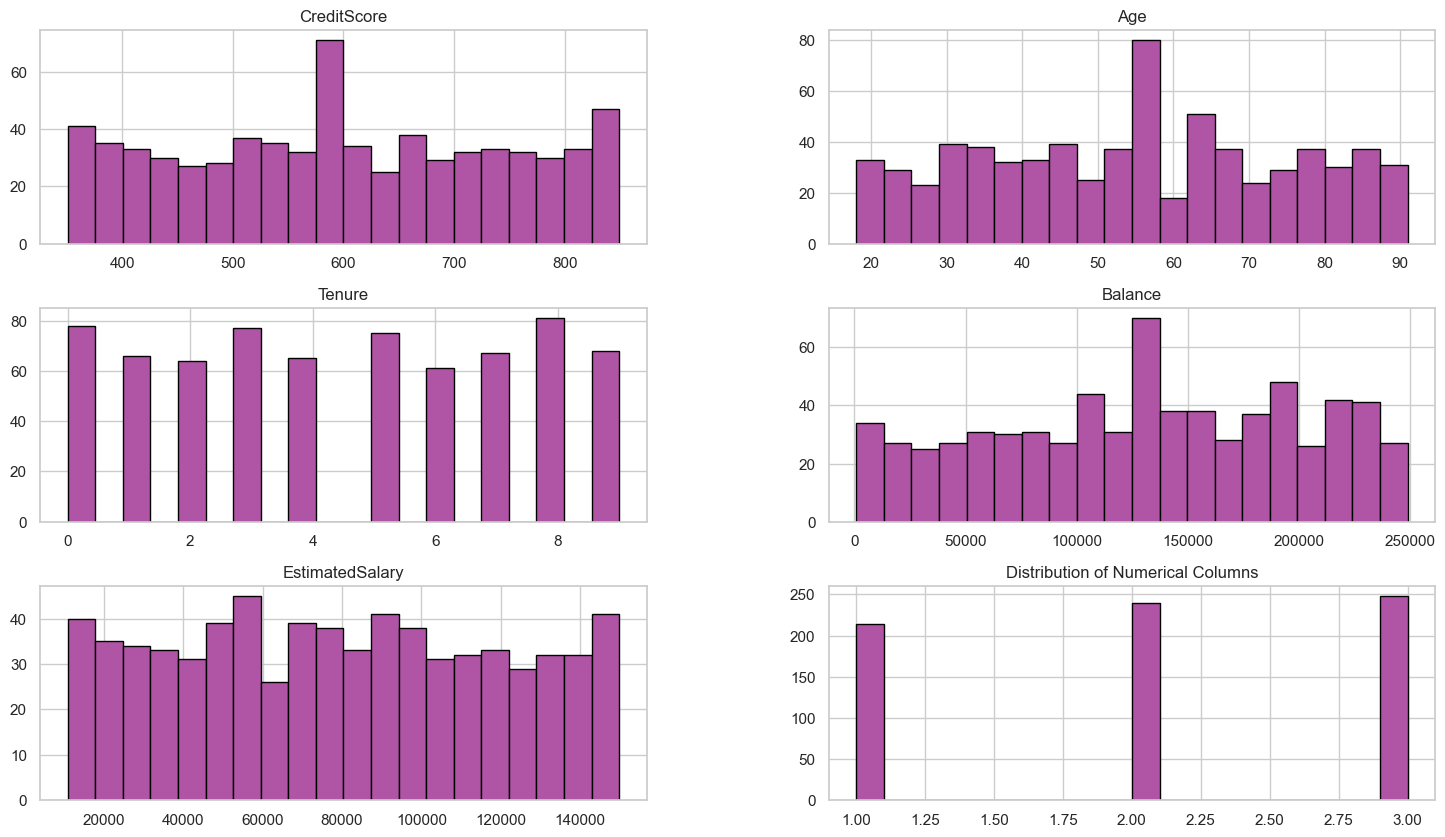

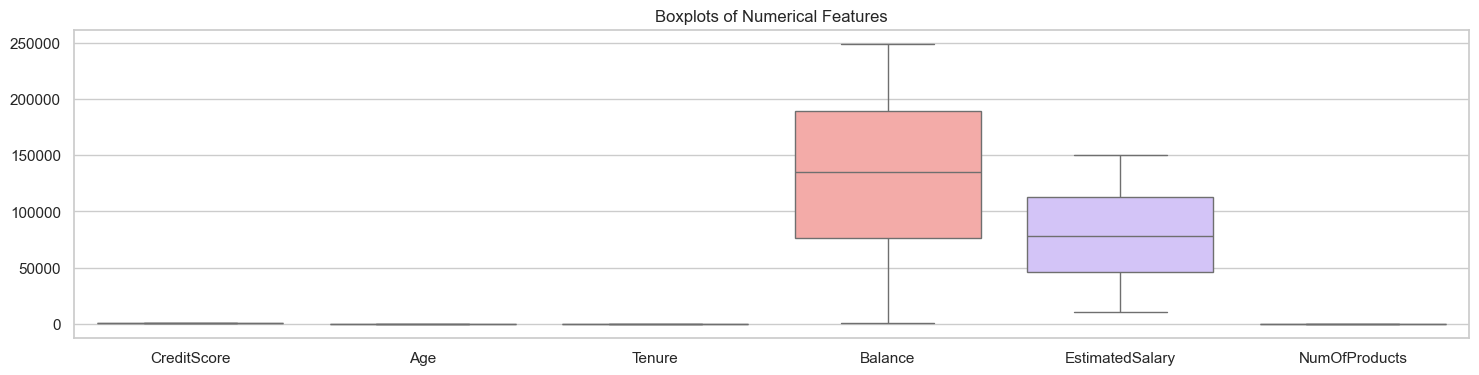

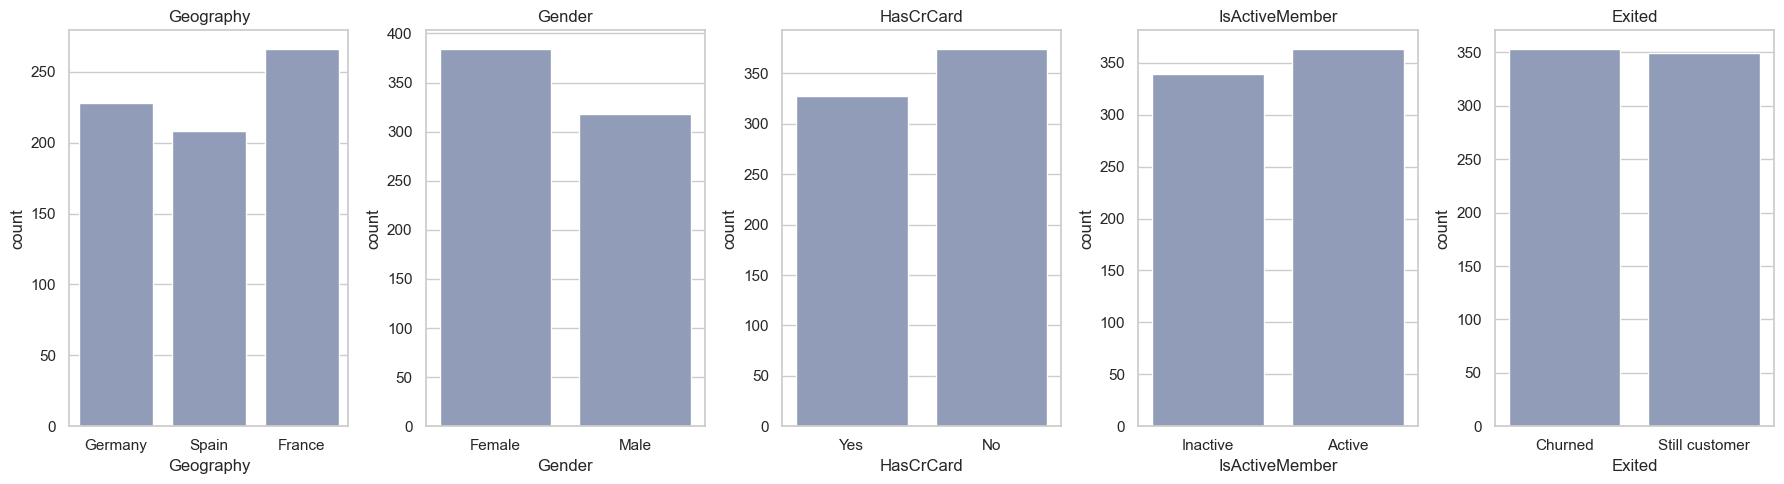

In [388]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']
cat_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Plots for Numerical Columns 

# Histogram 
df[num_col].hist(figsize=(18,10), bins= 20, edgecolor= 'Black', color='#b054a5')
plt.title("Distribution of Numerical Columns")
plt.show()

#  Boxplot
plt.figure(figsize=(18,4))
sns.boxplot(data= df[num_col])
plt.title("Boxplots of Numerical Features")
plt.show()

# Plots for Categorical Columns 
fig , axes = plt.subplots(1, len(cat_col), figsize= (18,5))
for i , col in enumerate(cat_col): 
    sns.countplot(data=df, x=col , ax=axes[i], color= '#8a99bf')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Step 3: Bivariate Analysis (Feature Relationships)

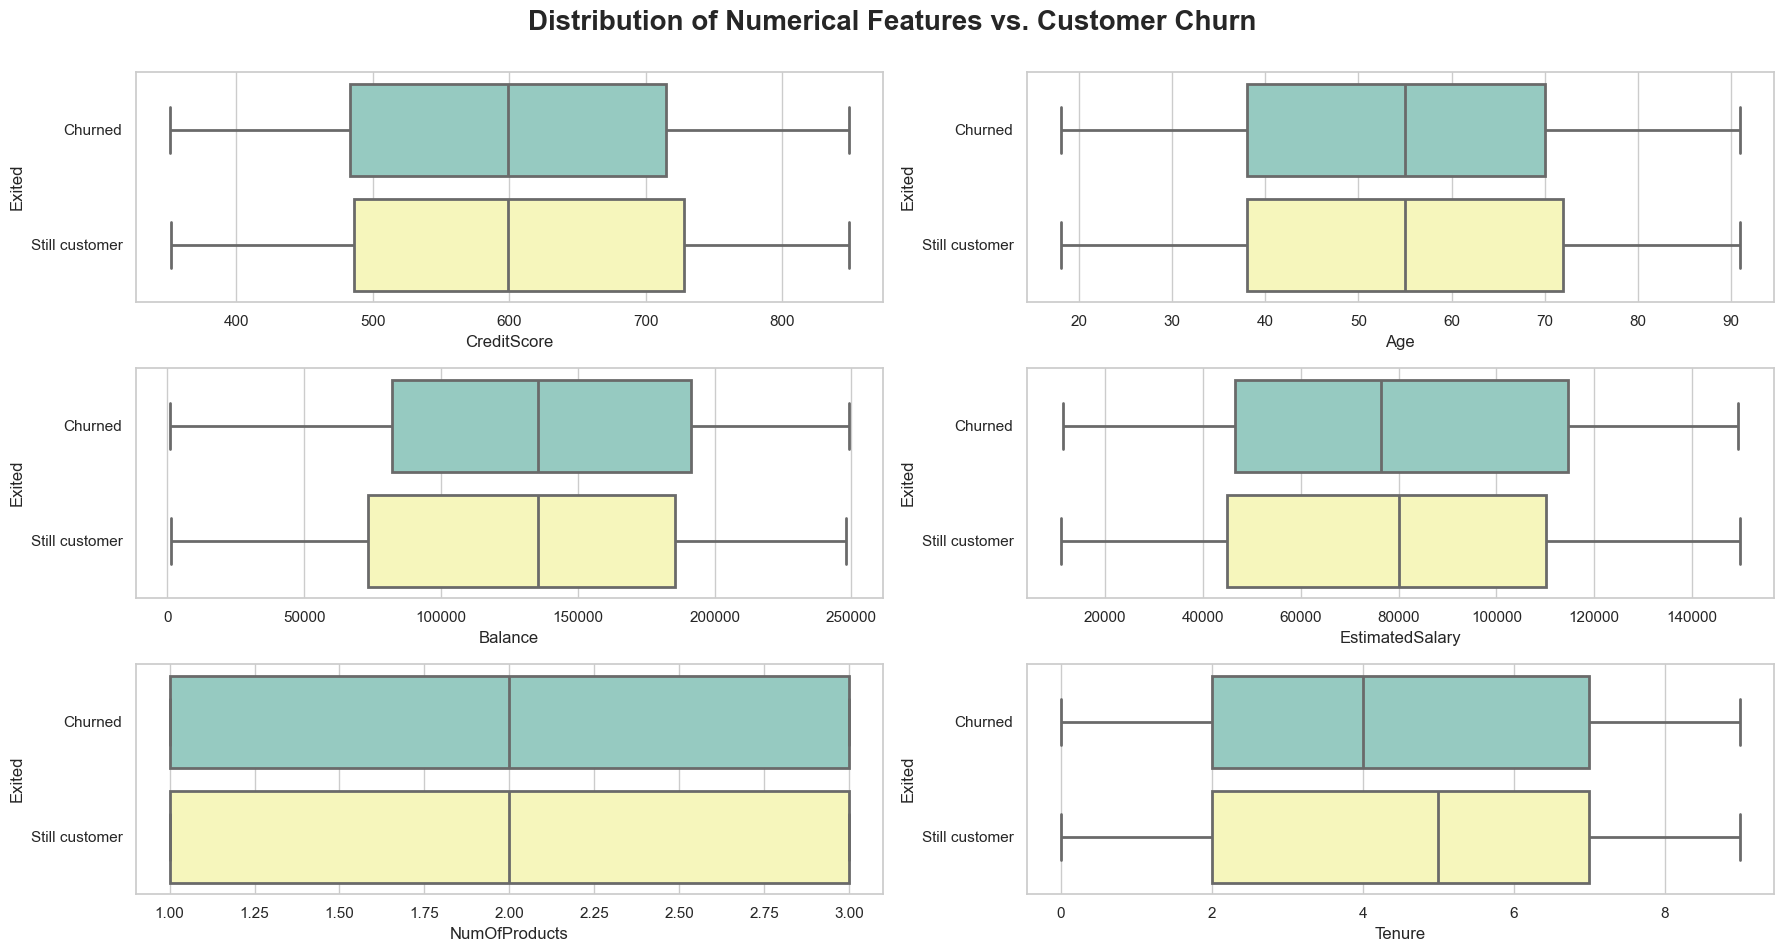

In [389]:
# --------------------------------------------
#  Categorical Relationships (Crosstab)
# --------------------------------------------

# For the numerical columns vs Target Column
num_col_1 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'NumOfProducts' , 'Tenure']
targ_col = df['Exited']
fig , axes = plt.subplots(3, 2, figsize= (18,10))
axes = axes.flatten() 

fig.suptitle(f'Distribution of Numerical Features vs. Customer Churn', fontsize= 20, fontweight= 'bold')
for i , col in enumerate(num_col_1): 
    sns.boxplot(data= df , x= col , y= targ_col , ax= axes[i], palette='Set3' , linewidth=2)

plt.tight_layout(rect=[0 ,0.03 ,1 , 0.98])
plt.show()


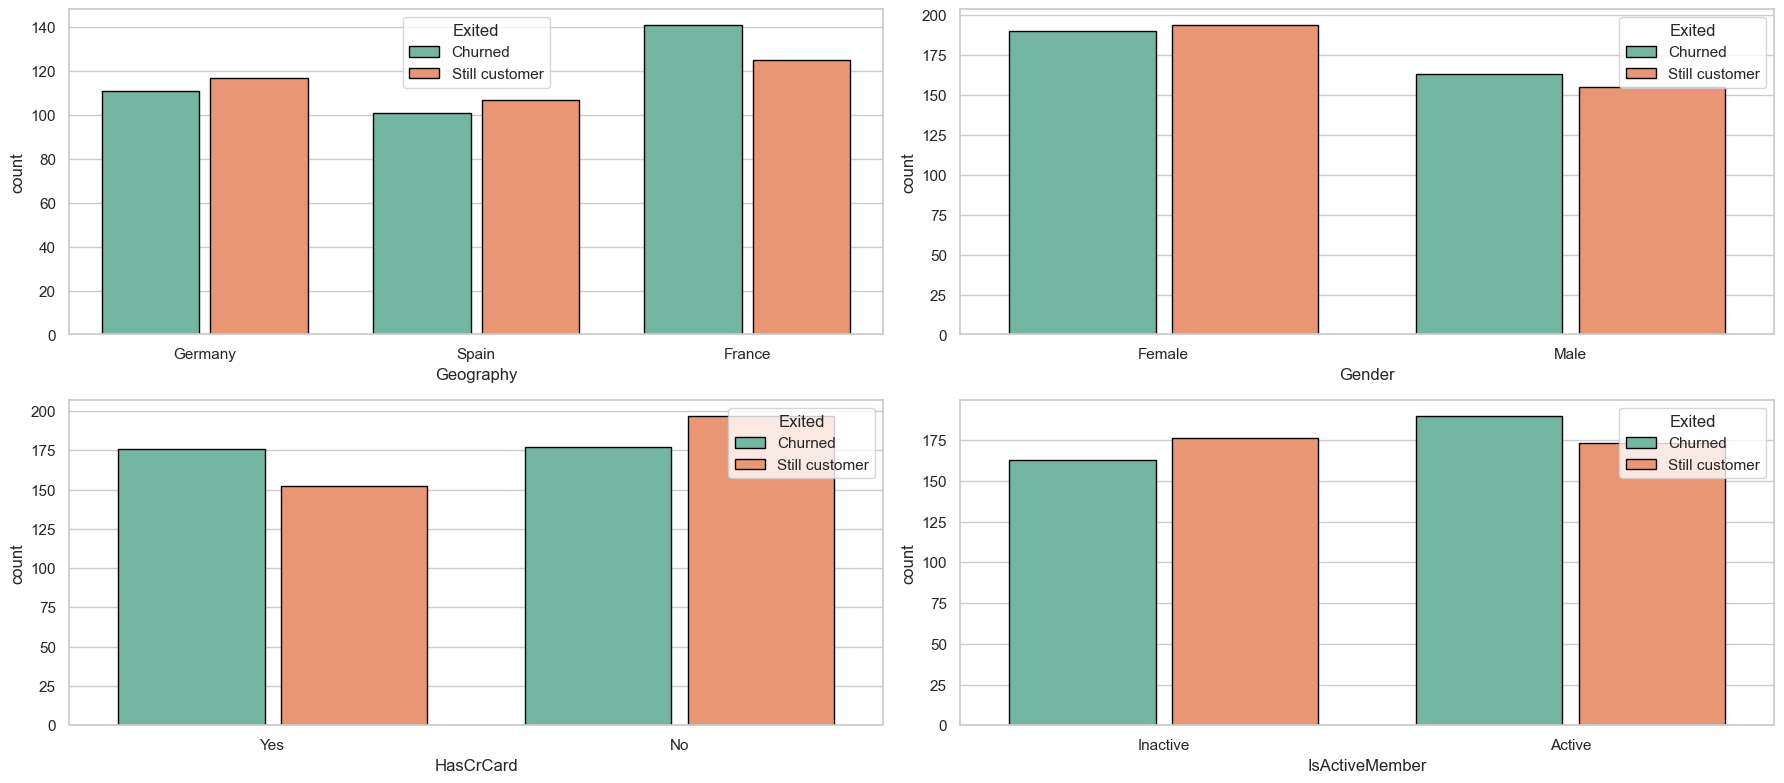

In [390]:
# for the categorical Columns vs Target Column

cat_col_1 = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
fig , axes = plt.subplots(2,2 , figsize= (18,8))
axes = axes.flatten()
palette_choice = 'Set2'

for i , col in enumerate(cat_col_1): 
    sns.countplot(data= df , x= col , hue= targ_col , ax= axes[i], palette=palette_choice, gap=0.1, edgecolor= 'black')
plt.tight_layout()
plt.show()

Step 4: Correlation & Insights

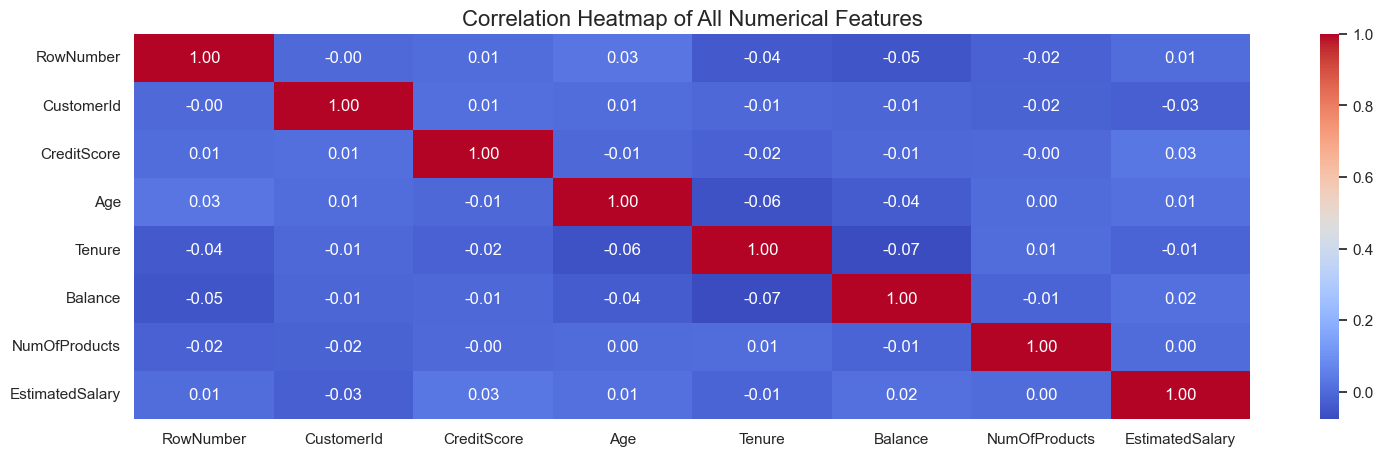

In [391]:
# 1. Compute Correlation Matrix
correlation_matrix = df.corr(numeric_only= True)
# 2. Create a Heatmap using Seaborn
plt.figure(figsize=(18,5))
sns.heatmap(correlation_matrix, annot= True , fmt= ".2f" , cmap= 'coolwarm', cbar= True)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=16)
plt.show()

--------------------------------------------
🧩 Phase 3 — Feature Engineering & Model Building
--------------------------------------------

In [392]:
# --------------------------------------------
# Phase 3 — Feature Engineering & Model Building
# --------------------------------------------

# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score )

# --------------------------------------------
# Step 1 — Feature Encoding
# --------------------------------------------
label_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
le = LabelEncoder()

for col in label_col:
    df[col] = le.fit_transform(df[col])

print("✅ Label Encoding Completed!\n")

# --------------------------------------------
# Step 2 — Feature Selection
# --------------------------------------------
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

print("✅ Feature & Target Variable Selected!\n")

# --------------------------------------------
# Step 3 — Train-Test Split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}\n")

# --------------------------------------------
# Step 4 — Feature Scaling
# --------------------------------------------
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

print("✅ Data Scaling Completed!\n")

# --------------------------------------------
# Step 5 — Model Training
# --------------------------------------------

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred_lr = lr.predict(X_test_scale)

# Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_cls = RandomForestClassifier(random_state=42) 
rf_cls.fit(X_train, y_train)
y_pred_rf_cls = rf_cls.predict(X_test)

print("✅ Models Trained Successfully!\n")

# --------------------------------------------
# Step 6 — Model Evaluation
# --------------------------------------------

# Function for REGRESSION model evaluation
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("-" * 40)

# Function for CLASSIFICATION model evaluation (NEW)
def evaluate_classification_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"**{model_name} Performance (Classification Metrics):**")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print("-" * 40)
# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_classification_model(y_test, y_pred_rf_cls, "Random Forest Classifier")

✅ Label Encoding Completed!

✅ Feature & Target Variable Selected!

Training Set Shape: (561, 9)
Testing Set Shape: (141, 9)

✅ Data Scaling Completed!

✅ Models Trained Successfully!

Linear Regression Performance:
R² Score: -0.019
MAE: 0.501
RMSE: 0.505
----------------------------------------
Random Forest Performance:
R² Score: -0.035
MAE: 0.491
RMSE: 0.509
----------------------------------------
**Random Forest Classifier Performance (Classification Metrics):**
Accuracy: 0.567
Precision: 0.566
Recall: 0.606
F1-Score: 0.585
----------------------------------------


--------------------------------------------
📦 Phase 4 — Final Dataset for Power BI
--------------------------------------------

In [393]:
df['Predicted_Churn'] = rf_cls.predict(X)
df.to_csv('Banking_Analysis_Dashboard.csv', index=False)
print("✅ Final dataset exported successfully for Power BI!")

✅ Final dataset exported successfully for Power BI!
